In [1]:
# !pip install -e ..

%load_ext autoreload
%autoreload 2

import pandas as pd
from bokeh.io import output_notebook
output_notebook();

# set global plotting backend for pandas
pd.options.plotting.backend = "ms_matplotlib" # one of: "ms_bokeh" "ms_matplotlib" "ms_plotly"

# df for MS experiment
df_ms_experiment = pd.read_csv("../test/test_data/TestMSExperimentDf.tsv", sep="\t")
# df for ion mobility spectra
df_ion_mobility_spectrum = pd.read_csv("../test/test_data/TestSpectrumDf.tsv", sep="\t")

Loading BokehJS ...

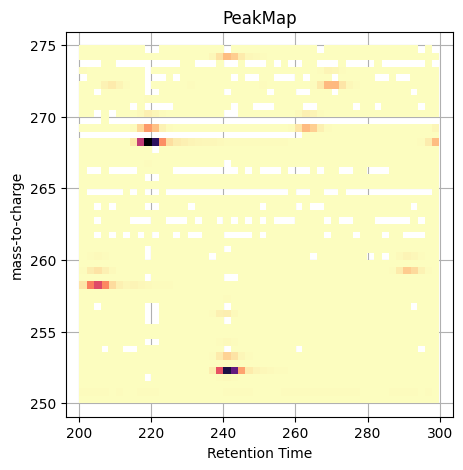

In [2]:
# MS experiment as peak map, peaks get binned by default if more then num_x_bins * num_y_bins
df_ms_experiment.plot(x="RT", y="mz", z="inty", kind="peakmap")

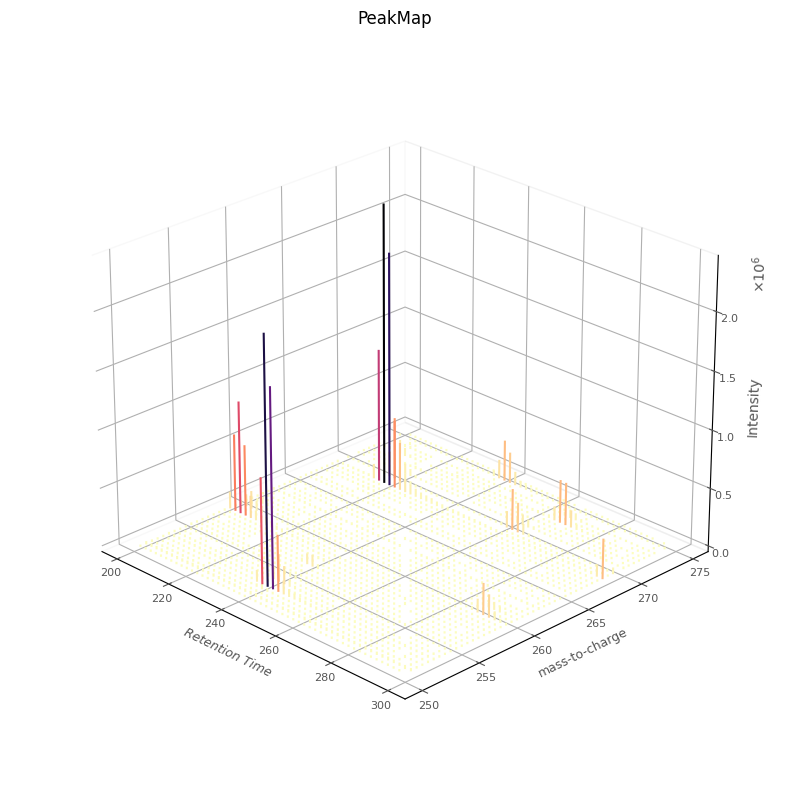

In [3]:
# MS experiment as a 3D peak map
df_ms_experiment.plot(x="RT", y="mz", z="inty", zlabel="Intensity",  kind="peakmap", plot_3d=True, height=800, width=900)

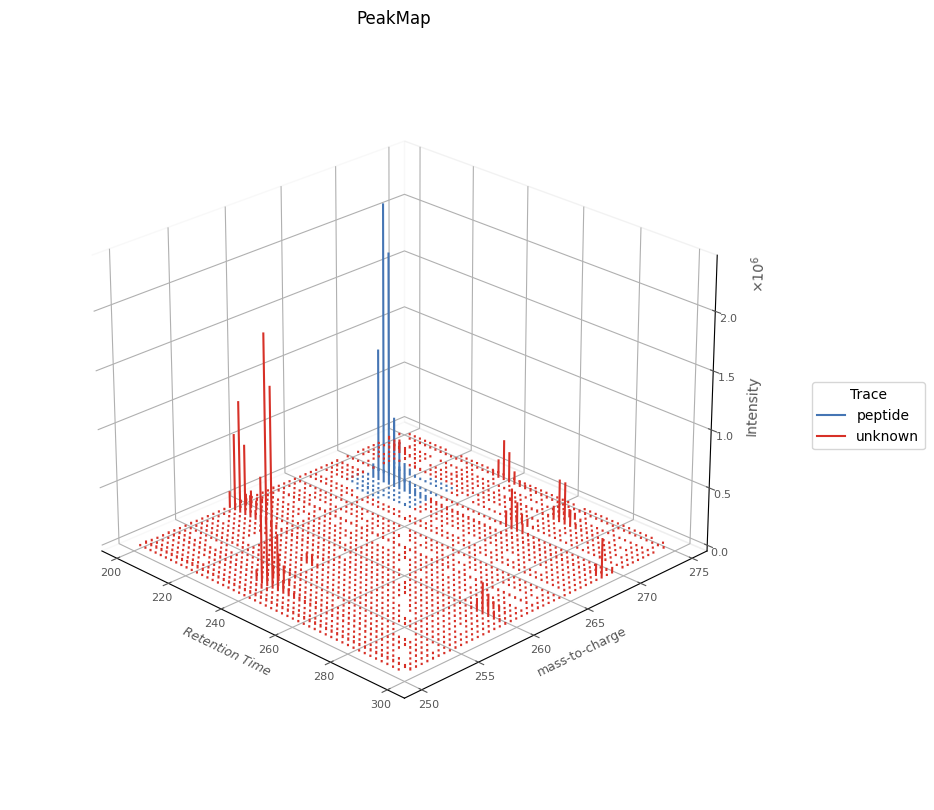

In [4]:
import numpy as np
#  Add label to separate peaks by an annotation
df_ms_experiment['label'] = 'unknown'
df_ms_experiment.iloc[ (np.ceil(df_ms_experiment.mz) < 272)  & (np.ceil(df_ms_experiment.mz) > 266) & \
(np.ceil(df_ms_experiment.RT) < 237)  & (np.ceil(df_ms_experiment.RT) > 212), 3] = "peptide"
df_ms_experiment.plot(x="RT", y="mz", z="inty", zlabel="Intensity", by='label', kind="peakmap", plot_3d=True, height=800, width=900)

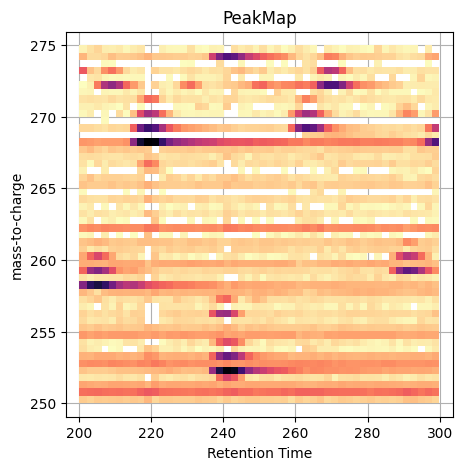

In [5]:
# using logarithmic z scale can improve visualization with more details
df_ms_experiment.plot(x="RT", y="mz", z="inty", kind="peakmap", z_log_scale=True)

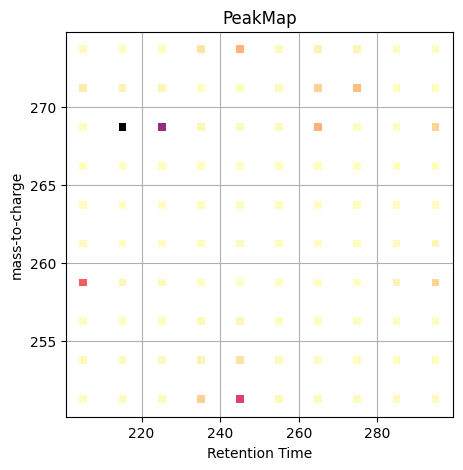

In [6]:
# playing around with too low bin sizes...
df_ms_experiment.plot(x="RT", y="mz", z="inty", kind="peakmap", num_x_bins=10, num_y_bins=10)

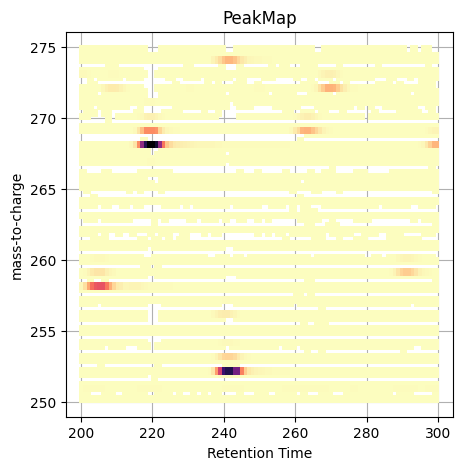

In [7]:
# playing around with larger bin sizes reveals more details...
df_ms_experiment.plot(x="RT", y="mz", z="inty", kind="peakmap", num_x_bins=100, num_y_bins=100)

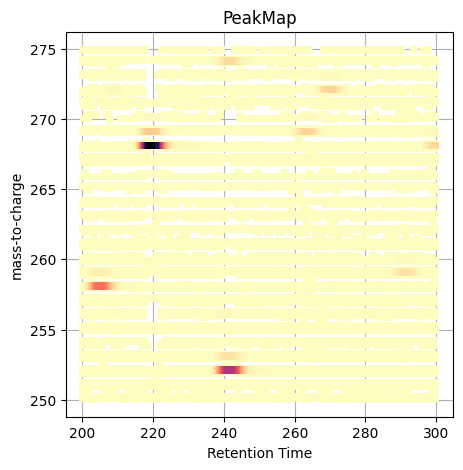

In [8]:
# turn off binning entirely, can be slow if peak map is large and often times not much more info is gained
df_ms_experiment.plot(x="RT", y="mz", z="inty", kind="peakmap", bin_peaks=False)

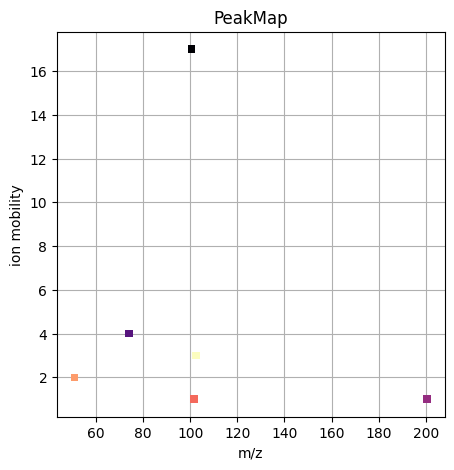

In [9]:
# ion mobility spectrum as peak map and relative intensity values
df_ion_mobility_spectrum.plot(x="mz", y="ion_mobility", z="intensity", kind="peakmap", xlabel="m/z",
                              ylabel="ion mobility", relative_intensity=True)

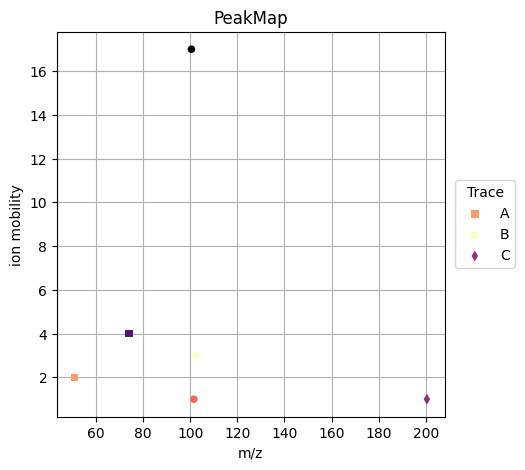

In [10]:
# ion mobility spectrum as peak map, grouping by column values plots groups with different marker shapes
df_ion_mobility_spectrum.plot(x="mz", y="ion_mobility", z="intensity", kind="peakmap", 
                              xlabel="m/z", ylabel="ion mobility", by="spectrum")